## RawData Exploration

In [2]:
library(stringr)
library(dplyr)
library(tidyr)
library(ggplot2)
library(grid)
library(caret)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: lattice


In [45]:
raw_data <- read.csv('flipkart_com-ecommerce_sample.csv')

In [46]:
head(raw_data,5)

uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications


## Tidying Up Data

In [47]:
str_replace_all(raw_data$product_category_tree,"'","") -> raw_data$product_category_tree

In [48]:
head(raw_data$product_category_tree)

[1] "[\"Clothing >> Womens Clothing >> Lingerie, Sleep & Swimwear >> Shorts >> Alisha Shorts >> Alisha Solid Womens Cycling Shorts\"]"
[2] "[\"Furniture >> Living Room Furniture >> Sofa Beds & Futons >> FabHomeDecor Fabric Double Sofa Bed (Finish Colo...\"]"           
[3] "[\"Footwear >> Womens Footwear >> Ballerinas >> AW Bellies\"]"                                                                   
[4] "[\"Clothing >> Womens Clothing >> Lingerie, Sleep & Swimwear >> Shorts >> Alisha Shorts >> Alisha Solid Womens Cycling Shorts\"]"
[5] "[\"Pet Supplies >> Grooming >> Skin & Coat Care >> Shampoo >> Sicons All Purpose Arnica Dog Shampoo (500 ml)\"]"                 
[6] "[\"Eternal Gandhi Super Series Crystal Paper Weight...\"]"

In [49]:
Func <- function(X){
    XX <- str_extract_all(X, "[a-zA-Z]+") 
    Y <- XX[[1]]
    return (paste(Y[c(1,2,4)],collapse=" "))
}

In [50]:
as.vector(sapply(raw_data$product_category_tree,Func)) -> raw_data$product_category_tree

In [51]:
raw_data$product_category_tree[1]

[1] "Clothing Womens Lingerie"

In [52]:
separate(raw_data,product_category_tree,into=c("Col1","Col2","Col3")) -> new_data

In [53]:
head(new_data)

uniq_id,crawl_timestamp,product_url,product_name,Col1,Col2,Col3,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications


In [54]:
tail(sort(table(new_data$Col1),rev=T),20)


Sunglasses     Health    Cameras     Sports  Furniture       Bags       Pens 
        40         43         82        166        180        265        313 
      Toys      Tools       Baby    Watches  Computers    Kitchen     Beauty 
       330        391        483        530        578        647        710 
Automotive    Mobiles   Footwear       Home  Jewellery   Clothing 
      1012       1099       1227       1753       3531       6198 

In [55]:
c("Clothing","Home","Footwear","Mobiles","Automotive","Beauty","Kitchen","Watches","Tools","Toys","Sports","Baby","Jewellery","Computers") -> Selected

In [56]:
Checkpoint1 <- filter(new_data, Col1 %in% Selected)

In [57]:
tail(sort(table(Checkpoint1$Col1),rev=T),20)


    Sports       Toys      Tools       Baby    Watches  Computers    Kitchen 
       166        330        391        483        530        578        647 
    Beauty Automotive    Mobiles   Footwear       Home  Jewellery   Clothing 
       710       1012       1099       1227       1753       3531       6198 

In [58]:
tail(sort(table(Checkpoint1$Col2),rev=T),20)


   Earrings     Fitness   Jewellery     Network      School      Laptop 
         95         166         166         202         330         343 
   Hardware        Care       Wrist        Kids      Dining  Furnishing 
        391         483         523         625         647         700 
        and     Bangles       Rings       Decor   Necklaces        Mens 
        710         724         743         929        1606        2113 
Accessories      Womens 
       2138        4682 

In [59]:
c("Mens","Necklaces","Accessories","Decor","Rings","Furnishing","Kids","Wrist","Care","Hardware","Network","Stationary"
 ,"Network","School","Laptop","Wallets","School","Bangles","Womens","Dining","Fitness","Earrings") -> Selected

In [60]:
Checkpoint2 <- filter(Checkpoint1, Col2 %in% Selected)

In [61]:
tail(sort(table(Checkpoint2$Col2),rev=T),20)


   Earrings     Fitness     Network      School      Laptop    Hardware 
         95         166         202         330         343         391 
       Care       Wrist        Kids      Dining  Furnishing     Bangles 
        483         523         625         647         700         724 
      Rings       Decor   Necklaces        Mens Accessories      Womens 
        743         929        1606        2113        2138        4682 

In [62]:
tail(sort(table(Checkpoint2$Col1),rev=T),20)


    Sports       Toys      Tools       Baby    Watches  Computers    Kitchen 
       166        330        391        483        523        545        647 
Automotive    Mobiles   Footwear       Home  Jewellery   Clothing 
       925       1099       1226       1629       3282       6194 

In [63]:
tail(sort(table(Checkpoint2$Col3),rev=T),20)


     Wedges      School      Sports      Winter      Shirts       Girls 
        207         214         214         225         234         287 
       Mugs       Linen   Gardening      Casual      Ethnic     Armlets 
        302         322         343         461         485         724 
         NA           T       parts       Needs    Lingerie Accessories 
        821         904         925         929        1208        1440 
  Necklaces     Western 
       1588        1981 

In [64]:
tail(sort(table(Checkpoint2$Col3),rev=T),50)


   Slippers   Adventure     Bedding    Trousers    Computer       Bulbs 
         33          34          35          35          36          39 
   Adapters    Anuradha     Bottles      Dining  Ballerinas      Sonata 
         43          48          48          49          51          56 
    Infants       Jeans      Fusion      Maxima       Tools       Inner 
         63          65          73          73          74          75 
  Batteries      Formal     Pillows        Pots       Flats    Footwear 
         83          85          95          98         100         105 
      Heels         USB        Boys        Wear     Routers        Kids 
        139         154         169         187         199         203 
     Wedges      School      Sports      Winter      Shirts       Girls 
        207         214         214         225         234         287 
       Mugs       Linen   Gardening      Casual      Ethnic     Armlets 
        302         322         343         461   

In [65]:
subset(Checkpoint2,select= c("crawl_timestamp","Col1","Col2","Col3","retail_price","discounted_price","is_FK_Advantage_product","brand")) -> Checkpoint2

In [66]:
Fixed <- na.omit(Checkpoint2)

In [67]:
Func <-  function(x){
    return (substring(x,1,10))
}
Fixed$crawl_timestamp <- sapply(Fixed$crawl_timestamp,Func)

In [68]:
Func <- function(x){
    return (as.POSIXct(strptime(x,"%Y-%m-%d")))
}

Fixed$crawl_timestamp <- Func(Fixed$crawl_timestamp)

In [69]:
as.numeric(as.logical(Fixed$is_FK_Advantage_product)) -> Fixed$is_FK_Advantage_product

In [70]:
Fixed$Demand=Fixed$retail_price/Fixed$discounted_price

In [71]:
Without_Discount <- subset(Fixed,select=-c(discounted_price))

In [72]:
Without_Discount[1,4] <- ""

In [73]:
head(Without_Discount)

crawl_timestamp,Col1,Col2,Col3,retail_price,is_FK_Advantage_product,brand,Demand
2016-03-25,Clothing,Womens,,999,0,Alisha,2.635884
2016-03-25,Footwear,Womens,Ballerinas,999,0,AW,2.002004
2016-03-25,Clothing,Womens,Lingerie,699,0,Alisha,2.617978
2016-03-25,Clothing,Womens,Lingerie,1199,0,Alisha,2.503132
2016-03-25,Footwear,Womens,Ballerinas,699,0,dilli bazaaar,2.002865
2016-03-25,Clothing,Womens,Lingerie,1199,0,Alisha,2.503132


In [74]:
Without_Discount$brand <- as.factor(Without_Discount$brand)

In [75]:
Without_Discount$Col1 <- as.factor(Without_Discount$Col1)
Without_Discount$Col2 <- as.factor(Without_Discount$Col2)
Without_Discount$Col3 <- as.factor(Without_Discount$Col3)

In [76]:
str(Without_Discount)

'data.frame':	17377 obs. of  8 variables:
 $ crawl_timestamp        : POSIXct, format: "2016-03-25" "2016-03-25" ...
 $ Col1                   : Factor w/ 13 levels "Automotive","Baby",..: 3 5 3 3 5 3 5 3 3 3 ...
 $ Col2                   : Factor w/ 18 levels "Accessories",..: 17 17 17 17 17 17 17 17 17 17 ...
 $ Col3                   : Factor w/ 302 levels "","A","Accessories",..: 1 20 154 154 20 154 20 251 154 154 ...
 $ retail_price           : int  999 999 699 1199 699 1199 1724 2299 999 999 ...
 $ is_FK_Advantage_product: num  0 0 0 0 0 0 0 0 0 0 ...
 $ brand                  : Factor w/ 3500 levels "","@home","1OAK",..: 137 302 137 137 776 137 1708 520 137 137 ...
 $ Demand                 : num  2.64 2 2.62 2.5 2 ...


In [77]:
write.csv(Without_Discount,"withTimestampL1.csv",row.names=F)

In [78]:
subset(Without_Discount,select=-c(crawl_timestamp)) -> With_Discount

In [81]:
str(With_Discount)
write.csv(With_Discount,"withoutTimestampL1.csv",row.names=F)

'data.frame':	17377 obs. of  7 variables:
 $ Col1                   : Factor w/ 13 levels "Automotive","Baby",..: 3 5 3 3 5 3 5 3 3 3 ...
 $ Col2                   : Factor w/ 18 levels "Accessories",..: 17 17 17 17 17 17 17 17 17 17 ...
 $ Col3                   : Factor w/ 302 levels "","A","Accessories",..: 1 20 154 154 20 154 20 251 154 154 ...
 $ retail_price           : int  999 999 699 1199 699 1199 1724 2299 999 999 ...
 $ is_FK_Advantage_product: num  0 0 0 0 0 0 0 0 0 0 ...
 $ brand                  : Factor w/ 3500 levels "","@home","1OAK",..: 137 302 137 137 776 137 1708 520 137 137 ...
 $ Demand                 : num  2.64 2 2.62 2.5 2 ...


In [83]:
str(With_Discount)

'data.frame':	17377 obs. of  7 variables:
 $ Col1                   : Factor w/ 13 levels "Automotive","Baby",..: 3 5 3 3 5 3 5 3 3 3 ...
 $ Col2                   : Factor w/ 18 levels "Accessories",..: 17 17 17 17 17 17 17 17 17 17 ...
 $ Col3                   : Factor w/ 302 levels "","A","Accessories",..: 1 20 154 154 20 154 20 251 154 154 ...
 $ retail_price           : int  999 999 699 1199 699 1199 1724 2299 999 999 ...
 $ is_FK_Advantage_product: num  0 0 0 0 0 0 0 0 0 0 ...
 $ brand                  : Factor w/ 3500 levels "","@home","1OAK",..: 137 302 137 137 776 137 1708 520 137 137 ...
 $ Demand                 : num  2.64 2 2.62 2.5 2 ...


# Model Formation and Save

In [84]:
lm(retail_price~.,data=With_Discount)-> Fit

In [85]:
Train <- read.csv("withoutTimestampL1.csv")
str(Train)

'data.frame':	17377 obs. of  7 variables:
 $ Col1                   : Factor w/ 13 levels "Automotive","Baby",..: 3 5 3 3 5 3 5 3 3 3 ...
 $ Col2                   : Factor w/ 18 levels "Accessories",..: 17 17 17 17 17 17 17 17 17 17 ...
 $ Col3                   : Factor w/ 301 levels "","A","Accessories",..: 1 20 154 154 20 154 20 250 154 154 ...
 $ retail_price           : int  999 999 699 1199 699 1199 1724 2299 999 999 ...
 $ is_FK_Advantage_product: int  0 0 0 0 0 0 0 0 0 0 ...
 $ brand                  : Factor w/ 2855 levels "","@home","1OAK",..: 116 256 116 116 625 116 1409 422 116 116 ...
 $ Demand                 : num  2.64 2 2.62 2.5 2 ...


In [86]:
# make predictions
predictions <- predict(Fit, Train)
# summarize accuracy
mse <- mean((Train$retail_price - predictions)^2,na.rm=T)

Warning message in predict.lm(Fit, Train):
"prediction from a rank-deficient fit may be misleading"

In [87]:
sqrt(mse)

[1] 1277.72

In [88]:
write.csv(Train,"PredictionsL1.csv",row.names=F)

In [1]:
read.csv("PredictionsL1.csv") -> Output

In [90]:
str(Output)

'data.frame':	17377 obs. of  7 variables:
 $ Col1                   : Factor w/ 13 levels "Automotive","Baby",..: 3 5 3 3 5 3 5 3 3 3 ...
 $ Col2                   : Factor w/ 18 levels "Accessories",..: 17 17 17 17 17 17 17 17 17 17 ...
 $ Col3                   : Factor w/ 301 levels "","A","Accessories",..: 1 20 154 154 20 154 20 250 154 154 ...
 $ retail_price           : int  999 999 699 1199 699 1199 1724 2299 999 999 ...
 $ is_FK_Advantage_product: int  0 0 0 0 0 0 0 0 0 0 ...
 $ brand                  : Factor w/ 2855 levels "","@home","1OAK",..: 116 256 116 116 625 116 1409 422 116 116 ...
 $ Demand                 : num  2.64 2 2.62 2.5 2 ...


In [91]:
head(Output)

Col1,Col2,Col3,retail_price,is_FK_Advantage_product,brand,Demand
Clothing,Womens,,999,0,Alisha,2.635884
Footwear,Womens,Ballerinas,999,0,AW,2.002004
Clothing,Womens,Lingerie,699,0,Alisha,2.617978
Clothing,Womens,Lingerie,1199,0,Alisha,2.503132
Footwear,Womens,Ballerinas,699,0,dilli bazaaar,2.002865
Clothing,Womens,Lingerie,1199,0,Alisha,2.503132


In [92]:
unique(filter(Train,Col1=="Computers")$Col2)

[1] Network Laptop 
18 Levels: Accessories Bangles Care Decor Dining Earrings ... Wrist

In [93]:
unique(Train$Col1) -> XXX

In [94]:
Lister=list()
for (value in XXX){
    Lister[[value]] <- unique(filter(Train,Col1==value)$Col2)
}

In [95]:
Lister

$Clothing
[1] Womens Kids   Mens  
18 Levels: Accessories Bangles Care Decor Dining Earrings ... Wrist

$Footwear
[1] Womens Mens   Kids  
18 Levels: Accessories Bangles Care Decor Dining Earrings ... Wrist

$Sports
[1] Fitness
18 Levels: Accessories Bangles Care Decor Dining Earrings ... Wrist

$Home
[1] Decor      Furnishing
18 Levels: Accessories Bangles Care Decor Dining Earrings ... Wrist

$Automotive
[1] Accessories
18 Levels: Accessories Bangles Care Decor Dining Earrings ... Wrist

$Tools
[1] Hardware
18 Levels: Accessories Bangles Care Decor Dining Earrings ... Wrist

$Baby
[1] Care
18 Levels: Accessories Bangles Care Decor Dining Earrings ... Wrist

$Mobiles
[1] Accessories
18 Levels: Accessories Bangles Care Decor Dining Earrings ... Wrist

$Watches
[1] Wrist
18 Levels: Accessories Bangles Care Decor Dining Earrings ... Wrist

$Toys
[1] School
18 Levels: Accessories Bangles Care Decor Dining Earrings ... Wrist

$Jewellery
[1] Bangles     Rings       Necklaces   Accessories Earrings   
18 Levels: Accessories Bangles Care Decor Dining Earrings ... Wrist

$Kitchen
[1] Dining
18 Levels: Accessories Bangles Care Decor Dining Earrings ... Wrist

$Computers
[1] Network Laptop 
18 Levels: Accessories Bangles Care Decor Dining Earrings ... Wrist

In [96]:
saveRDS(Lister, file = "my_list.rds")

In [97]:
save(Fit, file = "Final_Model1.rda")

In [9]:
load("Final_Model1.rda")


In [99]:
head(Train)

Col1,Col2,Col3,retail_price,is_FK_Advantage_product,brand,Demand
Clothing,Womens,,999,0,Alisha,2.635884
Footwear,Womens,Ballerinas,999,0,AW,2.002004
Clothing,Womens,Lingerie,699,0,Alisha,2.617978
Clothing,Womens,Lingerie,1199,0,Alisha,2.503132
Footwear,Womens,Ballerinas,699,0,dilli bazaaar,2.002865
Clothing,Womens,Lingerie,1199,0,Alisha,2.503132


In [10]:
Output <- read.csv("PredictionsL1.csv")
rbind(Output,c("Clothing","Mens","",1000,0,"",2)) -> Output
as.numeric(Output$retail_price) -> Output$retail_price
as.numeric(Output$Demand) -> Output$Demand
as.integer(Output$is_FK_Advantage_product) -> Output$is_FK_Advantage_product
Output[is.na(Output)] <- ""
as.factor(Output$Col1) -> Output$Col1
as.factor(Output$brand) -> Output$brand

tail(Output)
head(Output)

,Col1,Col2,Col3,retail_price,is_FK_Advantage_product,brand,Demand
17373,Baby,Care,Kids,1500,0,WallDesign,2.054795
17374,Baby,Care,Kids,1429,0,Wallmantra,1.250219
17375,Baby,Care,Kids,1299,0,Elite Collection,1.300300
17376,Baby,Care,Kids,1499,0,Elite Collection,1.250209
17377,Baby,Care,Kids,1499,0,Elite Collection,1.500501
17378,Clothing,Mens,,1000,0,,2.000000


Col1,Col2,Col3,retail_price,is_FK_Advantage_product,brand,Demand
Clothing,Womens,,999,0,Alisha,2.635884
Footwear,Womens,Ballerinas,999,0,AW,2.002004
Clothing,Womens,Lingerie,699,0,Alisha,2.617978
Clothing,Womens,Lingerie,1199,0,Alisha,2.503132
Footwear,Womens,Ballerinas,699,0,dilli bazaaar,2.002865
Clothing,Womens,Lingerie,1199,0,Alisha,2.503132


In [11]:
predict(Fit,Output[nrow(Output),])
predict(Fit,Output[4,])

Warning message in predict.lm(Fit, Output[nrow(Output), ]):
"prediction from a rank-deficient fit may be misleading"

17378 
1151.354

Warning message in predict.lm(Fit, Output[4, ]):
"prediction from a rank-deficient fit may be misleading"

4 
999.1499

In [105]:
unique(Output$Col3)

[1]               Ballerinas    Lingerie      Sports        Boys         
  [6] Fusion        Cargos        Ethnic        Formal        Casual       
 [11] Needs         parts         Hardware      Winter        Accessories  
 [16] Wedges        Bath          Linen         Western       Wear         
 [21] Shirts        Cobra         Aries         Maserati      Vizion       
 [26] Camerii       Jeans         Colat         Rochees       Rorlig       
 [31] T             Alfajr        TAG           Costa         Breitling    
 [36] Calibro       Fluid         Disney        Cartier       Lois         
 [41] Felix         Kool          Franck        Vencer        Casela       
 [46] Timer         Titan         Srushti       Q             Escort       
 [51] Estilo        Jack          North         Rich          Skmei        
 [56] Kms           Swag          Hala          Ridas         Now          
 [61] Jacques       Oxter         Positif       DSIGNER       fastrack     
 [66] A             Sale          Britex        wish          Lenco        
 [71] Rockstar      Elantra       Marvel        Eleganzza     Zoop         
 [76] Shoppingekart DSigner       SwissFire     Logues        Room         
 [81] Girls         Musical       Armlets       Footwear      Flats        
 [86] Pillows       Navaksha      Heels         Posto         Elite        
 [91] Jewlook       Puzzles       Cutlery       Bulbs         Suits        
 [96] Home          Mugs          Routers       Alternate     Dupli        
[101] Keyboards     Casserole     Slippers      USB           Boots        
[106] Tuelip        Gardening     Trousers      Nursing       Bedding      
[111] School        Dining        Bottles       Disposables   Infants      
[116] Sterling      Crockery      Gold          Jewels        Hand         
[121] Necklaces     Inner         Pots          Maternity     Furnishings  
[126] Laptop        Laundry       Anuradha      Adventure     JUHI         
[131] Remix         Pastry        Soft          Grooming      Mouse        
[136] C             Anti          Tools         Party         Desire       
[141] Sitaram       DICE          Italian       Pittsburgh    palito       
[146] Omen          Carlos        Texus         Adino         ESIDON       
[151] Sofa          Wisdom        Invaders      Yves          V            
[156] PIEXIM        Glassware     Lids          Outdoor       Potty        
[161] Adapters      Activity      Jewellers     Sandals       Role         
[166] Cookers       Baking        Steamers      Magic         Cars         
[171] Batteries     Field         Fastrack      Nexus         Sonata       
[176] Times         Flippd        Geonaute      Maxima        Timewel      
[181] Figo          SVM           HMT           SF            Global       
[186] Noise         Omax          Lamex         Gift          Neo          
[191] Stylisda      Jazma         Petrol        Sir           Only         
[196] Stoln         Klaus         Olvin         Hourglass     Like         
[201] Forex         RAA           Coverings     Starsy        fourgee      
[206] Cleaning      Kitchen       Naaz          Viral         Clovia       
[211] Shoe          REMSON        Tie           DOLZ          INDILEGO     
[216] TIMBERLAKE    Casseroles    Leggings      Scion         misshruts    
[221] Curren        Minuut        Chains        Safety        Cables       
[226] Fabrics       Combo         Tangerine     Mentiezi      Silver       
[231] Golden        Johareez      Outdazzle     Samaa         Ruvee        
[236] Avaron        B             WI            Fashion       gurjari      
[241] Wi            SENECIO       ANAHI         Variation     Shihibas     
[246] Mivera        sharp         Dimple        hbs           Romex        
[251] Kids          Relish        Learning      Remote        Creations    
[256] India         jewels        Fogg          Luba          Fighter      
[261] Swiss         Geneva        Yepme         Fo

### Identifying the Best Cluster using Elbow Method

In [106]:
cluster=c()
SSE=c()

Warning message:
"Ignoring unknown parameters: line"

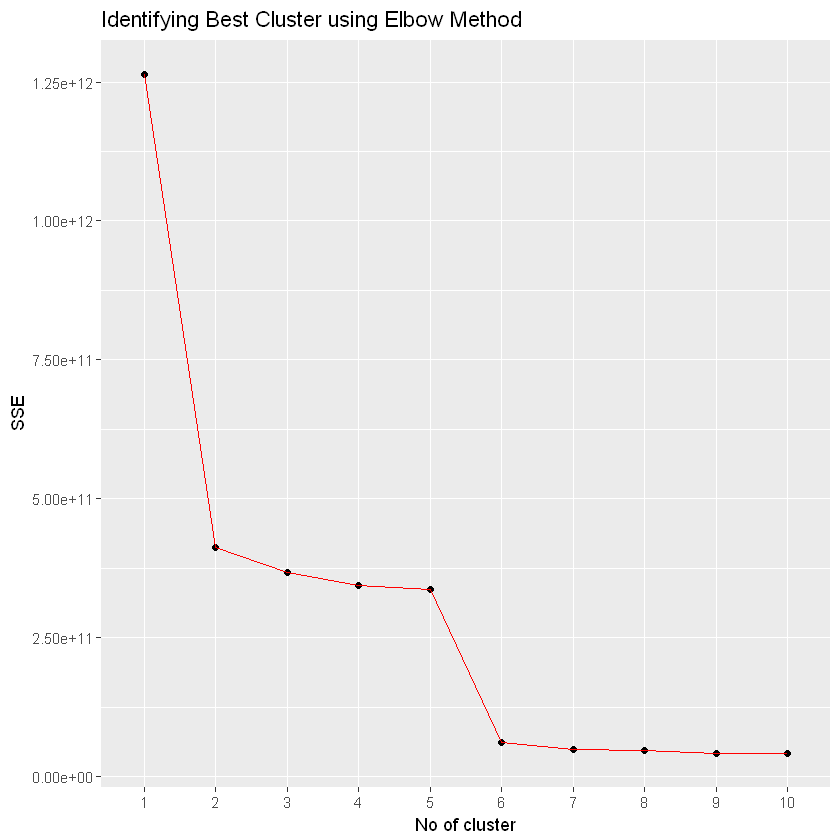

In [107]:
for (i in 1:10){
    irisCluster <- kmeans(select(Train,c(retail_price,Demand,is_FK_Advantage_product)), i, nstart = 20)
    cluster <- c(cluster,i)
    SSE <- c(SSE,irisCluster$tot.withinss)
    
    
}

Elbow=data.frame(cluster,SSE)
ggplot(aes(x=factor(cluster),y=SSE,group=1),data=Elbow)+geom_point(pch=16)+geom_line(line="dotdash",color="red") -> p
p+labs(x="No of cluster",title="Identifying Best Cluster using Elbow Method")

**The best no of Cluster as per elbow method is 6**

In [108]:
Elbow

cluster,SSE
1,1.263838e+12
2,4.128000e+11
3,3.676358e+11
4,3.436815e+11
5,3.367892e+11
6,6.089688e+10
7,4.810869e+10
8,4.651138e+10
9,4.200407e+10
10,4.131850e+10


--------------------------------------------

-------------------------

In [12]:
df <- read.csv("withTimestampL1.csv")
str(df)

'data.frame':	17377 obs. of  8 variables:
 $ crawl_timestamp        : Factor w/ 125 levels "2015-12-01","2015-12-03",..: 43 43 43 43 43 43 43 43 43 43 ...
 $ Col1                   : Factor w/ 13 levels "Automotive","Baby",..: 3 5 3 3 5 3 5 3 3 3 ...
 $ Col2                   : Factor w/ 18 levels "Accessories",..: 17 17 17 17 17 17 17 17 17 17 ...
 $ Col3                   : Factor w/ 301 levels "","A","Accessories",..: 1 20 154 154 20 154 20 250 154 154 ...
 $ retail_price           : int  999 999 699 1199 699 1199 1724 2299 999 999 ...
 $ is_FK_Advantage_product: int  0 0 0 0 0 0 0 0 0 0 ...
 $ brand                  : Factor w/ 2855 levels "","@home","1OAK",..: 116 256 116 116 625 116 1409 422 116 116 ...
 $ Demand                 : num  2.64 2 2.62 2.5 2 ...


In [13]:
Func <- function(x){
    return (as.POSIXct(strptime(x,"%Y-%m-%d")))
}

df$crawl_timestamp <- Func(df$crawl_timestamp)

In [15]:
daily <- group_by(df, Months=months(crawl_timestamp),Col1,Col2)
MonthsData <- summarise(daily,Price=mean(retail_price),Demand=mean(Demand))
str(MonthsData)
write.csv(MonthsData,"SummarisedL1.csv",row.names=F)

Classes 'grouped_df', 'tbl_df', 'tbl' and 'data.frame':	136 obs. of  5 variables:
 $ Months: chr  "April" "April" "April" "April" ...
 $ Col1  : Factor w/ 13 levels "Automotive","Baby",..: 1 2 3 3 3 4 5 5 5 6 ...
 $ Col2  : Factor w/ 18 levels "Accessories",..: 1 3 10 12 17 11 10 12 17 4 ...
 $ Price : num  1338 1039 1431 2725 1795 ...
 $ Demand: num  2.58 1.75 1.87 2 1.89 ...
 - attr(*, "vars")= chr  "Months" "Col1"
 - attr(*, "drop")= logi TRUE


------------------------------------------------------------------------

In [265]:

Train <- read.csv("withoutTimestampL1.csv")

In [266]:
na.omit(Train) -> Train

In [267]:
With_Discount<-filter(Train,Col1=="Clothing")
irisCluster <- kmeans(select(With_Discount,c(retail_price,Demand,is_FK_Advantage_product)), 6, nstart = 20)
irisCluster$tot.withinss

[1] 1565581480

In [268]:
irisCluster$size

[1]   27  851  157    2 2582 2545

In [269]:
irisCluster$tot.withinss

[1] 1565581480

In [270]:
select(With_Discount,c(retail_price,Demand,is_FK_Advantage_product)) -> Xtrr

In [271]:
irisCluster <- kmeans(rbind(Xtrr,c(1000,8.8,0)), 5, nstart = 20)

In [275]:
nrow(Without_Discount)

[1] 17377

In [276]:
tail(irisCluster$cluster,15)

[1] 1 1 1 4 4 1 1 5 1 1 5 1 1 4 4

### Plots and Visualization

Warning message:
"Removed 28 rows containing non-finite values (stat_boxplot)."

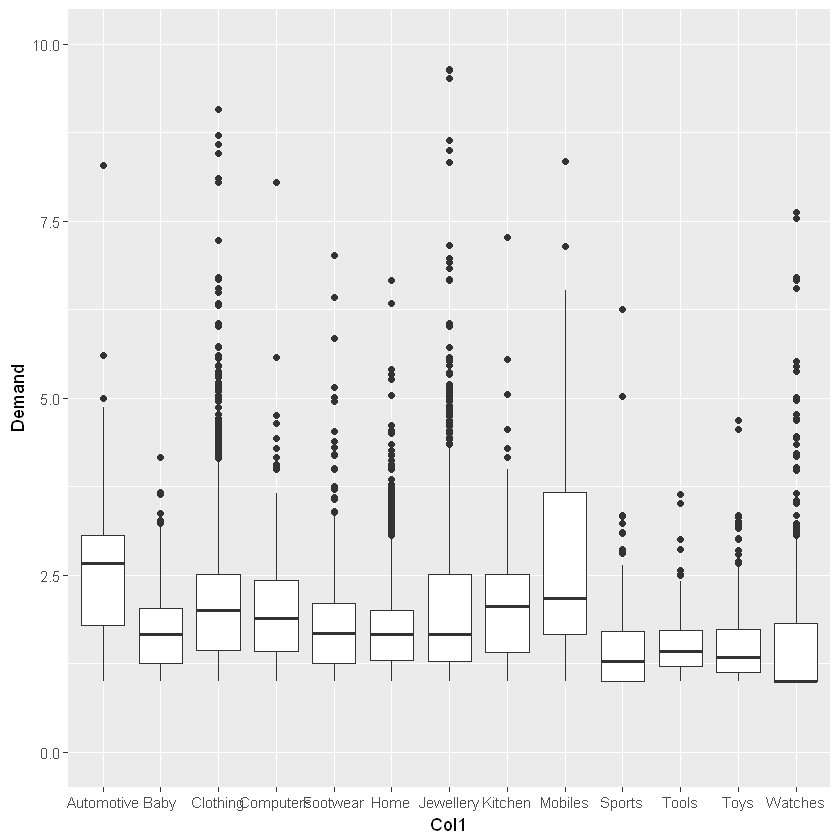

In [216]:
ggplot(aes(x=Col1,y=Demand),data=df)+geom_boxplot()+ylim(c(0,10))

Warning message:
"Removed 244 rows containing non-finite values (stat_boxplot)."

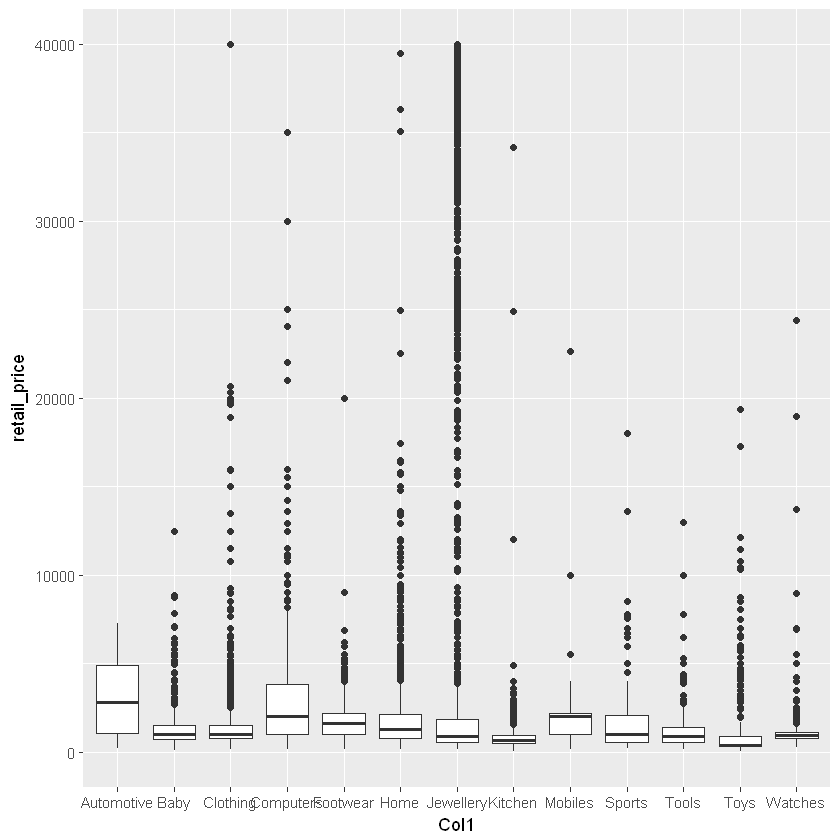

In [217]:
ggplot(aes(x=Col1,y=retail_price),data=df)+geom_boxplot()+ylim(c(0,40000))

Warning message:
"Removed 1109 rows containing missing values (geom_point)."

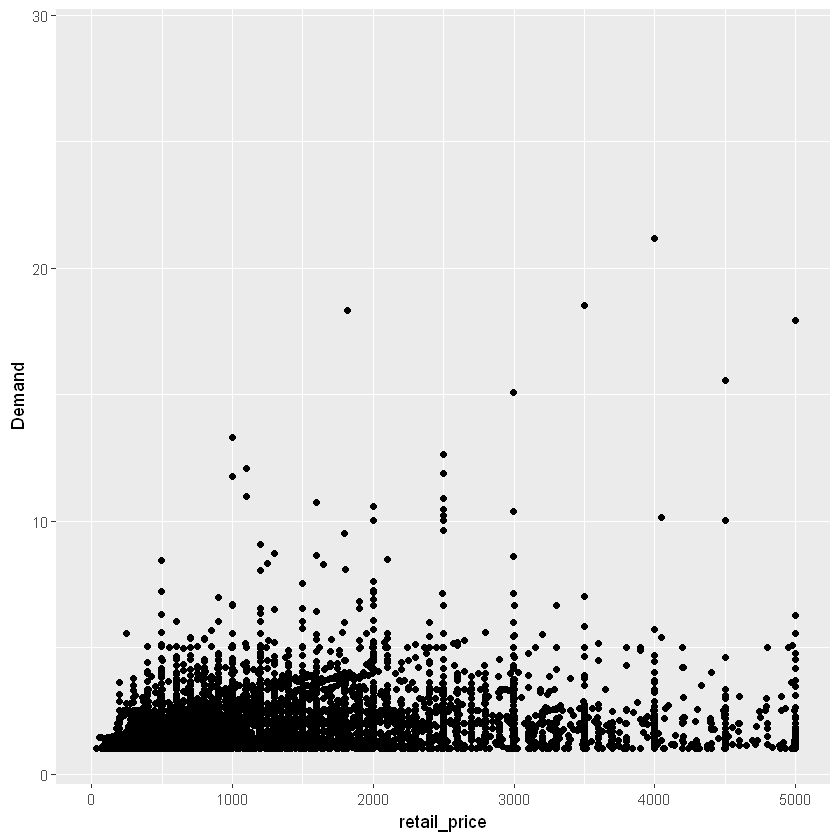

In [218]:
ggplot(aes(x=retail_price,y=Demand),data=df)+geom_point()+xlim(c(0,5000))

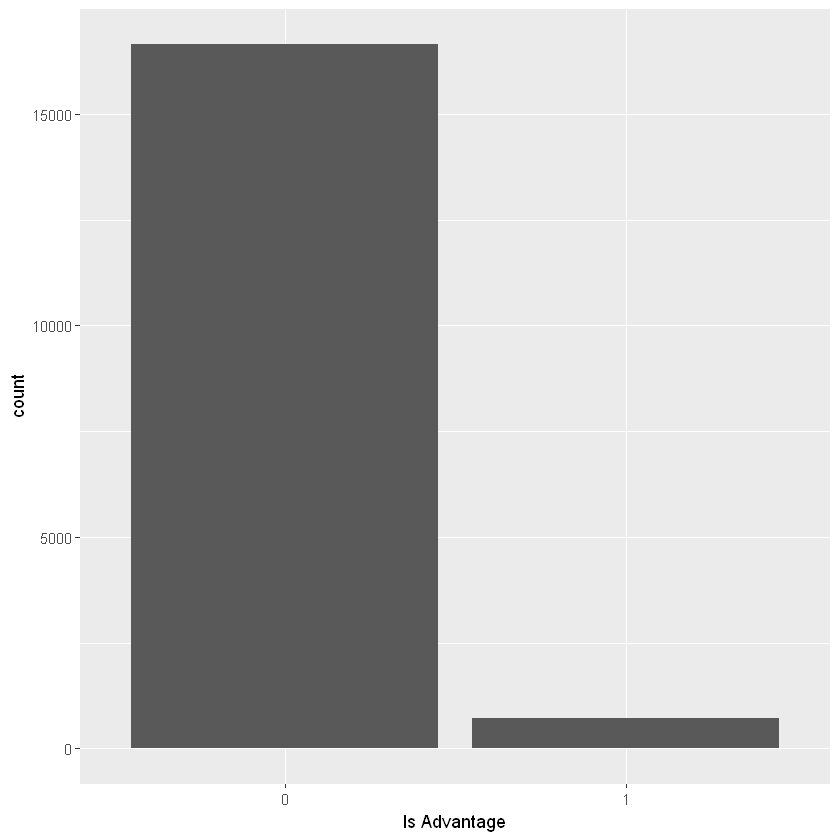

In [219]:
ggplot(aes(x=factor(is_FK_Advantage_product)),data=df)+geom_bar()+xlab("Is Advantage")

In [235]:
MonthsData <- read.csv('SummarisedL1')


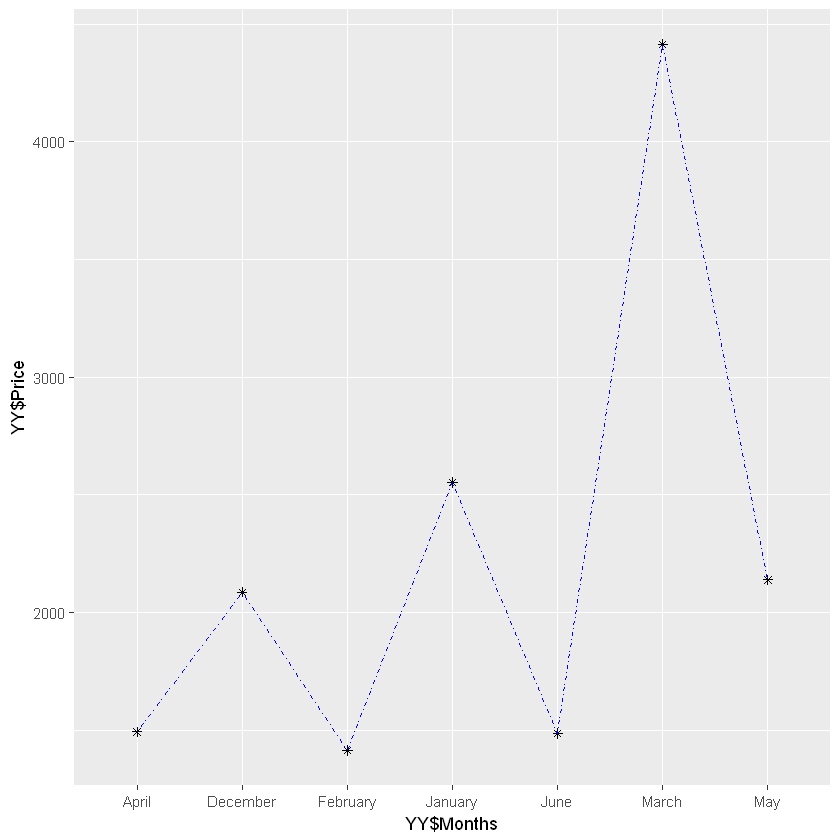

In [236]:
YY=subset(MonthsData,Col1==c("Home"))
ggplot(aes(x=YY$Months,y=YY$Price,group=1),data=YY)+geom_point(shape=8)+geom_line(linetype="dotdash",color="blue")


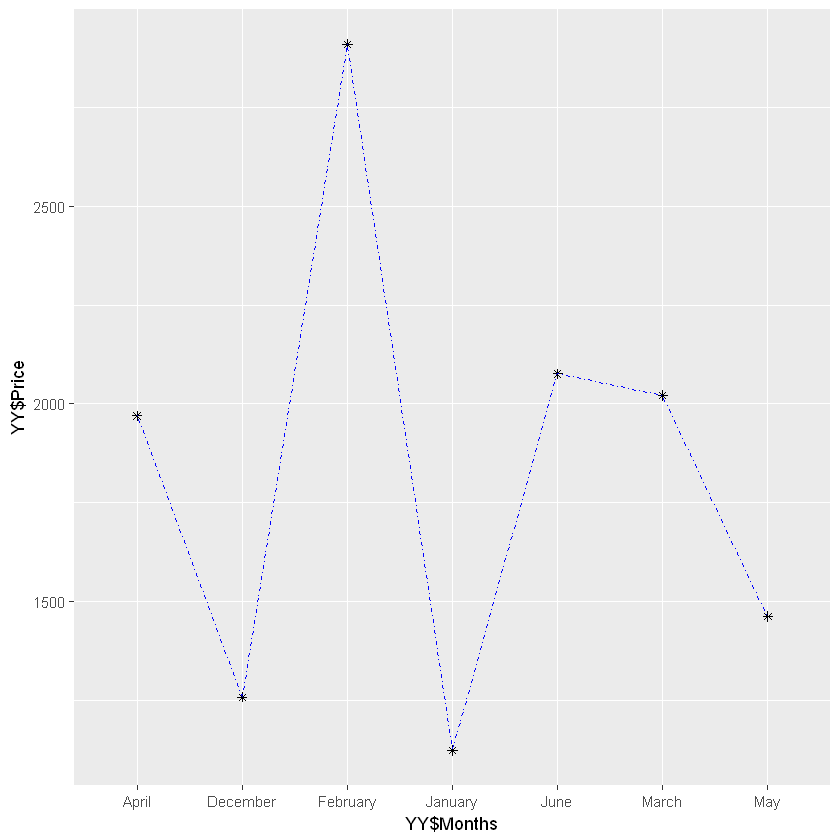

In [228]:
YY=subset(MonthsData,Col1==c("Clothing"))
ggplot(aes(x=YY$Months,y=YY$Price,group=1),data=YY)+geom_point(shape=8)+geom_line(linetype="dotdash",color="blue")


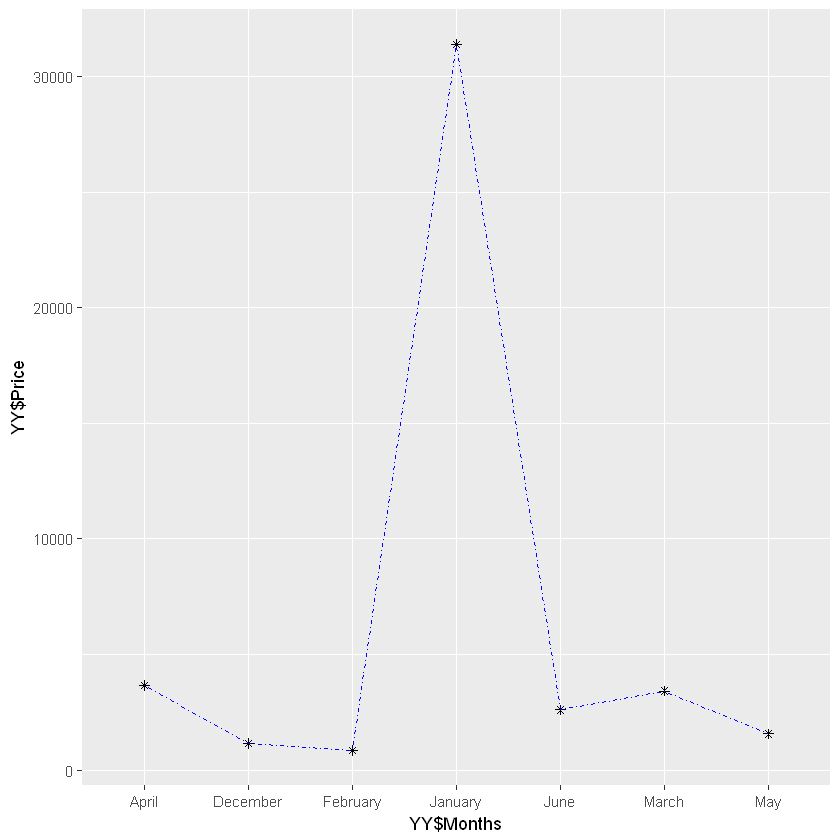

In [229]:
YY=subset(MonthsData,Col1==c("Jewellery"))
ggplot(aes(x=YY$Months,y=YY$Price,group=1),data=YY)+geom_point(shape=8)+geom_line(linetype="dotdash",color="blue") -> Plot1
Plot1

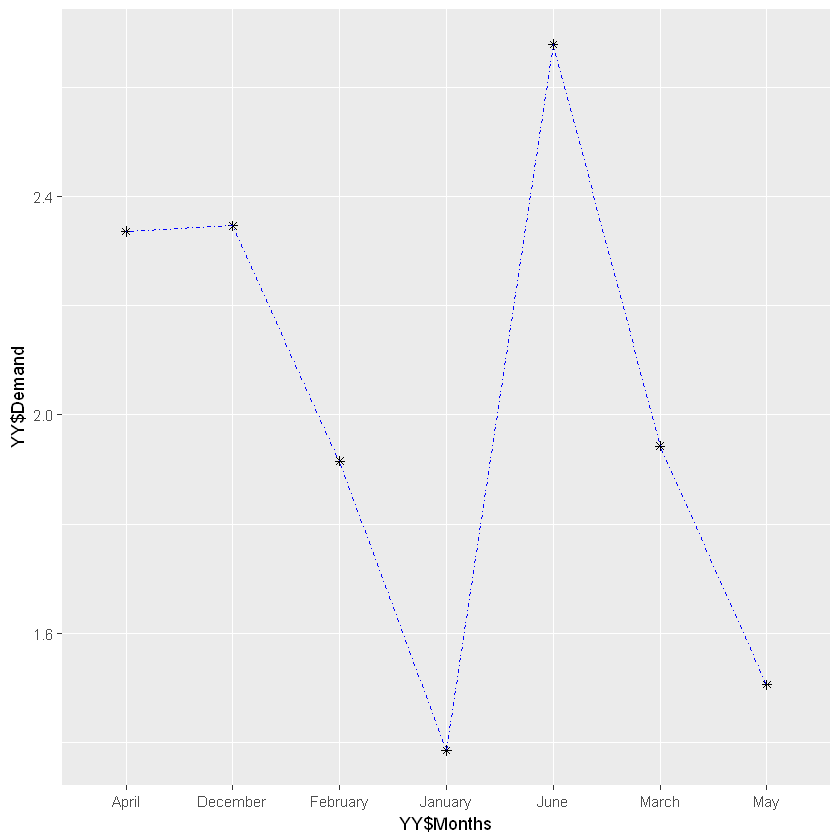

In [230]:
YY=subset(MonthsData,Col1==c("Jewellery"))
ggplot(aes(x=YY$Months,y=YY$Demand,group=1),data=YY)+geom_point(shape=8)+geom_line(linetype="dotdash",color="blue") -> Plot2
Plot2


In [287]:
write.csv(MonthsData,"HomeTable.csv",row.names=F)

In [ ]:
grid.Extra(plot1,plot2)

In [2]:
#-----------------

In [3]:
read.csv("PredictionsL1.csv") -> df

In [4]:
str(df)

'data.frame':	17377 obs. of  7 variables:
 $ Col1                   : Factor w/ 13 levels "Automotive","Baby",..: 3 5 3 3 5 3 5 3 3 3 ...
 $ Col2                   : Factor w/ 18 levels "Accessories",..: 17 17 17 17 17 17 17 17 17 17 ...
 $ Col3                   : Factor w/ 300 levels "A","Accessories",..: 153 19 153 153 19 153 19 249 153 153 ...
 $ retail_price           : int  999 999 699 1199 699 1199 1724 2299 999 999 ...
 $ is_FK_Advantage_product: int  0 0 0 0 0 0 0 0 0 0 ...
 $ brand                  : Factor w/ 2855 levels "","@home","1OAK",..: 116 256 116 116 625 116 1409 422 116 116 ...
 $ Demand                 : num  2.64 2 2.62 2.5 2 ...


In [6]:
df <- read.csv("PredictionsL1.csv")

In [28]:
YY <- subset(df,Col1=="Clothing")


Warning message:
"Removed 84 rows containing non-finite values (stat_boxplot)."

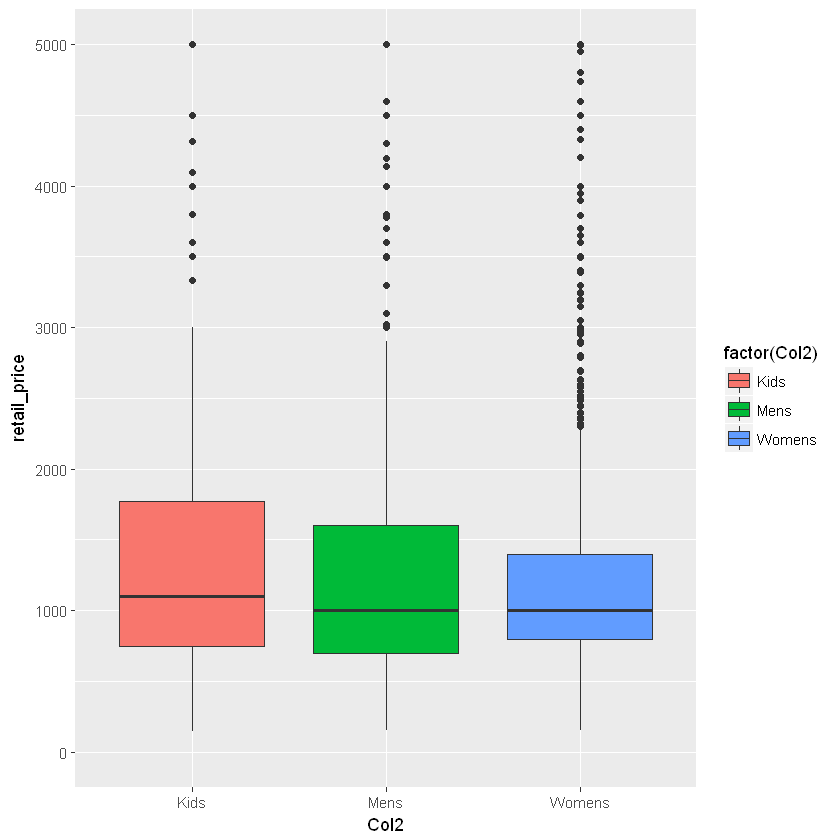

In [28]:
ggplot(aes(x=Col2,y=retail_price),data=YY)+geom_boxplot(aes(fill=factor(Col2)))+ylim(0,5000)

Warning message:
"Removed 84 rows containing non-finite values (stat_bin)."

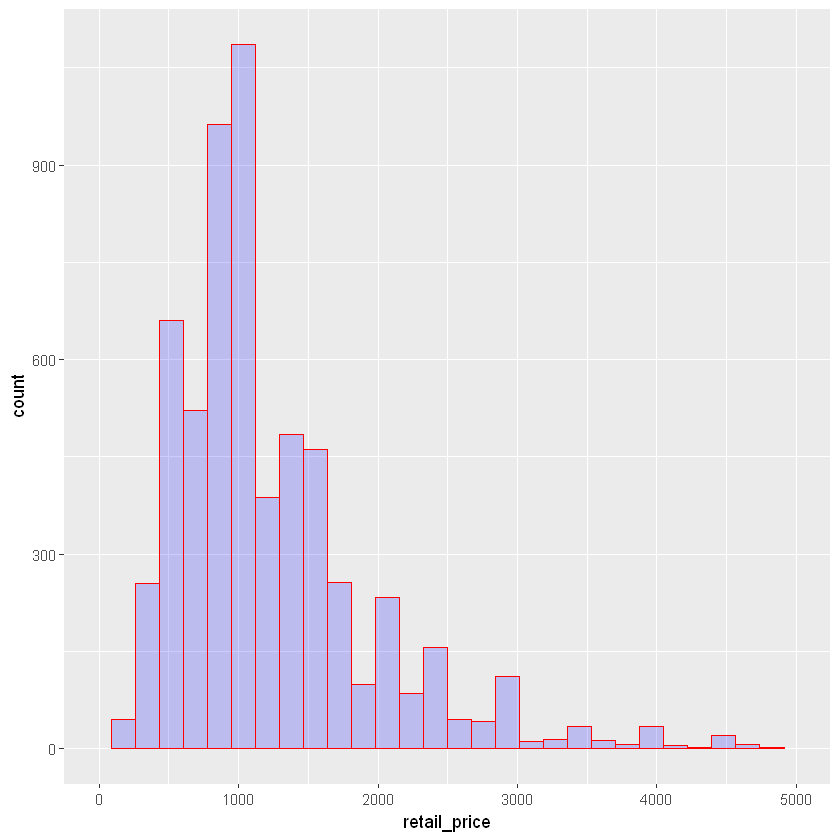

In [35]:
ggplot(aes(x=retail_price),data=YY)+geom_histogram(bins=30,fill="blue",col="red",alpha=.2)+xlim(0,5000)

Warning message:
"Removed 1109 rows containing non-finite values (stat_boxplot)."

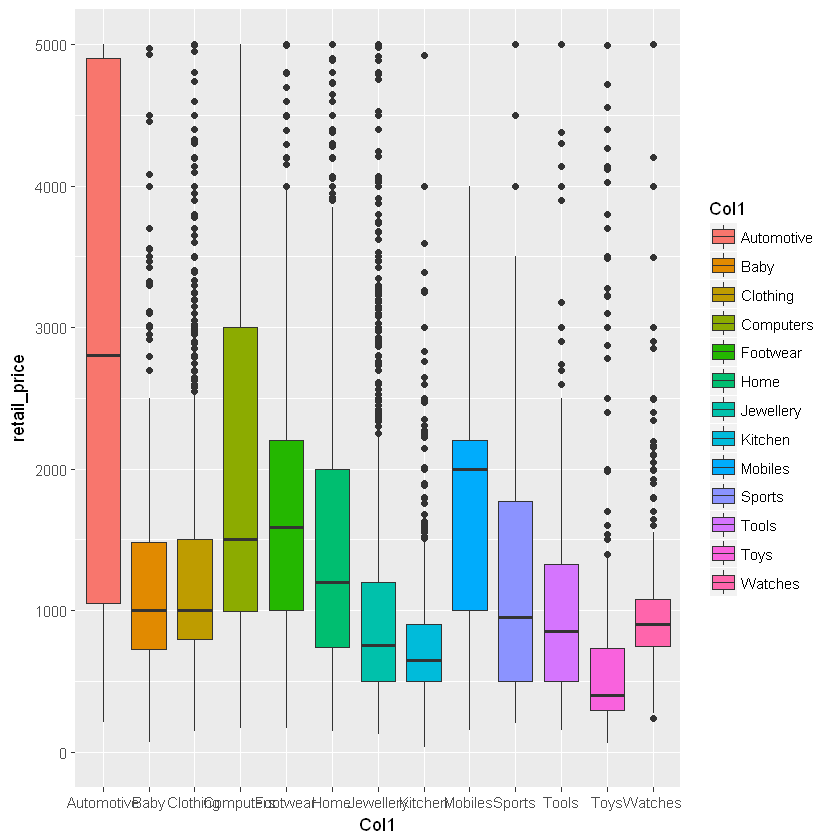

In [58]:
ggplot(aes(x=Col1,y=retail_price,fill=Col1),data=df)+geom_boxplot()+ylim(c(0,5000))

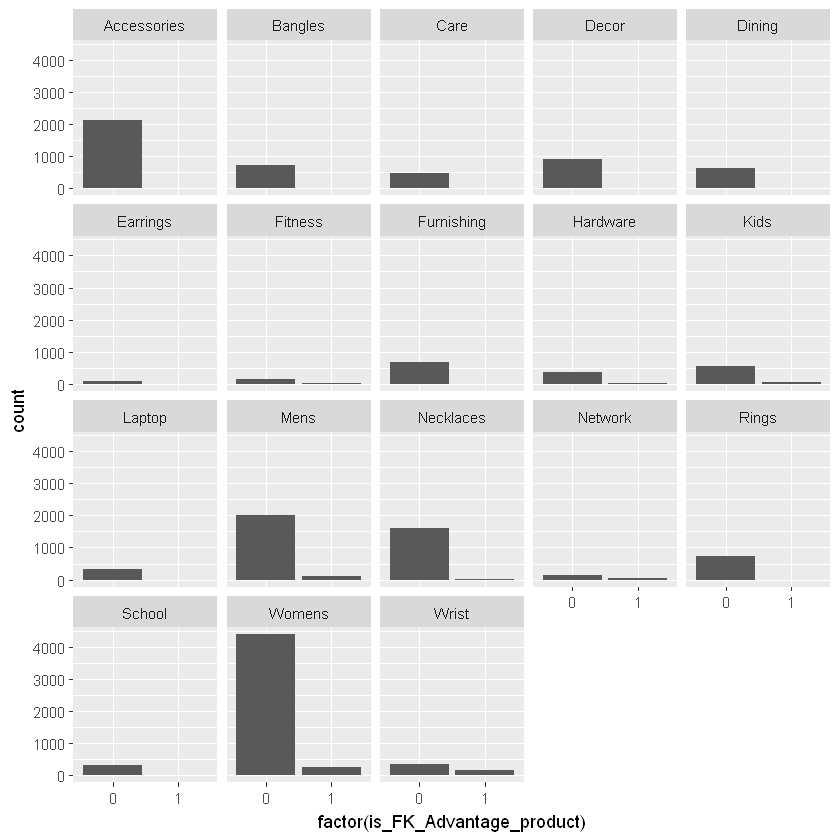

In [56]:
ggplot(aes(x=factor(is_FK_Advantage_product)),data=df)+geom_bar() -> p
p+facet_wrap(~Col2)

In [27]:
### Clickstream Code

Train <- read.csv("PredictionsL1.csv")
With_Discount<-filter(Train,Col1=="Footwear")
With_Discount <- select(With_Discount,c(retail_price,Demand,is_FK_Advantage_product))
With_Discount <- rbind(With_Discount,c(1000,1.2,0))
irisCluster <- kmeans(With_Discount, 6, nstart = 5)
XX <- cbind(With_Discount,Clusters=irisCluster$cluster)
          Points <- tail(XX$Clusters)[6]
          XX<- subset(XX,Clusters==Points)
          return (XX[sample(nrow(XX),4),][-8])

,retail_price,Demand,is_FK_Advantage_product,Clusters
444,399,1.000000,0,5
186,499,1.000000,0,5
440,499,1.250627,1,5
1199,499,1.087146,0,5


In [24]:
XX <- cbind(With_Discount,Clusters=irisCluster$cluster)
tail(XX$Clusters)[6]


[1] 6

In [175]:
sample(XX,size=3) -> Y
length(Y)

[1] 3

In [182]:
XX[sample(nrow(XX),3),][-4]

,retail_price,Demand,is_FK_Advantage_product
676,1599,1.672594,1
1155,1290,1.434928,0
1088,1099,2.202405,0


In [158]:
With_Discount <- rbind(With_Discount))
irisCluster <- kmeans(With_Discount, 6, nstart = 20)


ERROR: Error in do_one(nmeth): NA/NaN/Inf in foreign function call (arg 1)


In [159]:
cbind(Train,irisCluster$cluster)

ERROR: Error in data.frame(..., check.names = FALSE): arguments imply differing number of rows: 17377, 6165


In [88]:
table(irisCluster$cluster)


   1    2    3    4    5    6 
  27  852  157    2 2543 2586 

In [96]:
length(irisCluster$cluster)

[1] 6167

In [157]:
na.omit(With_Discount) -> With_Discount

In [167]:
tail(With_Discount)

,retail_price,Demand,is_FK_Advantage_product
1220,1099,1.222469,0
1221,1099,1.429129,0
1222,2599,3.336329,0
1223,899,1.000000,0
1224,1799,3.605210,0
1225,1000,1.200000,0


In [29]:
###Full Shiny R Code


library(ggplot2)
library(gridExtra)
library(dplyr)

Lister <- readRDS("my_list.rds")

MonthsData<- read.csv("HomeTable.csv")

Output <- read.csv("PredictionsL1.csv")

load("Final_Model1.rda")
shinyApp (
  fluidPage(
    
   titlePanel( h3("Price Estimation and Product Clickstream")),
   br(),
    
    fluidRow(
      column(12,div(style = "height:500px", 
                   tabsetPanel(
                                
                               tabPanel("Summary", uiOutput("summary")), 
                               tabPanel("Similar Products to the Input",dataTableOutput("table")),
                               tabPanel("Plot", plotOutput("plot")),
                               tabPanel("Plot1", plotOutput("plot1")),
                               tabPanel("Plot2", plotOutput("plot2")),
                               tabPanel("Plot3", plotOutput("plot3")),
                               tabPanel("Plot4", plotOutput("plot4"))
                               )
                   ))
             
             ),
      
    
    hr(),
    
    fluidRow(
      column(3,
            
             br(),
             sliderInput("DemandRate","Maximum Concession",min=0,max=100,value=0),
             checkboxInput("CheckInput",strong("Is Your Product Flipkart or Amazon Verified"))
             
      ),
      column(4,offset=1,
             selectInput("Category1","Category the Product Belongs",
                         choices =c("Clothing","Jewellery","Home","Footwear","Mobiles","Automotive","Kitchen",
                          "Watches","Toys","Sports","Computers")),
             selectInput("Category2","Category the Product Belongs","placeholder"),
                        
                  
             textInput("Category3","Category the Product Belongs"
                         )
             ),
      column(3,offset=1,
             textInput("Brand","Brand of the Product"),
             br(),
             actionButton("update" ,"Predict", icon("refresh"),
                          class = "btn btn-primary"))
    )
  ),
  server=function(input,output,session){
    
    observe({
     
      x <- input$Category1
      y <- Lister[[x]]
      updateSelectInput(session, "Category2", choices = y)
    })
    
    observe({
      if(input$update>0){
        Demandate <- input$DemandRate/100
        Demandate <- ((1)/(1-Demandate))
        rbind(Output,c(input$Category1,input$Category2,input$Category3,0,as.integer(input$CheckInput),input$Brand,Demandate)) -> Output
        as.numeric(Output$retail_price) -> Output$retail_price
        as.numeric(Output$Demand) -> Output$Demand
        as.integer(Output$is_FK_Advantage_product) -> Output$is_FK_Advantage_product
        Output[is.na(Output)] <- ""
        as.factor(Output$Col1) -> Output$Col1
        as.factor(Output$brand) -> Output$brand
       Prediction <-predict(Fit,Output[nrow(Output),])
        output$summary <- renderUI({
        x<-paste("The Price of Prediction of your required item is",round(Prediction,2))
        x<-paste(x,"<br>")
        x<-paste(x,"<strong>Its about 66% Higher than element</strong>")
        HTML(x)
        
        })
        output$plot <- renderPlot({
          
          YY=subset(MonthsData,Col1==c(input$Category1))
          p1<-  ggplot(aes(x=YY$Months,y=YY$Price,group=1),data=YY)+geom_point(shape=8)+geom_line(linetype="dotdash",color="blue")+ylab(paste("Price",input$Category))+labs(x="Months",title=paste("Price Variation of Retail Price with Month on",input$Category1))
          p2 <- ggplot(aes(x=YY$Months,y=YY$Demand,group=1),data=YY)+geom_point(shape=8)+geom_line(linetype="dotdash",color="blue")+ylab(paste("Demand",input$Category))+labs(x="Months",title=paste("Price Variation of Demand with Month on",input$Category1))
          grid.arrange(p1,p2)
        })
        
        output$plot1 <- renderPlot({
          YY=subset(Output,Col1==input$Category1)
          p2<- ggplot(aes(x=Col1,y=retail_price,fill=Col1),data=Output)+geom_boxplot()+ylim(c(0,5000))
          p2 <- p2+labs(x="Categories",y="Retail Price",title="Comparision of Retail Price Variation on different Categorical Items using Boxplot")
          p2
          })
        
        output$plot2 <- renderPlot({
          YY=subset(Output,Col1==input$Category1)
          p1<- ggplot(aes(x=retail_price),data=YY)+geom_histogram(bins=30,fill="blue",col="red",alpha=.9)+xlim(0,5000)
          p1 <-p1+labs(x="Retail Price",title="Distribution of Retail Price of Categorical Item Choosen")
          p1
          })
        
        output$plot3 <- renderPlot({
          YY=subset(Output,Col1==input$Category1)
          p1 <- ggplot(aes(x=Col2,y=retail_price),data=YY)+geom_boxplot(aes(fill=factor(Col2)))+ylim(0,5000)
          p1 <- p1 +labs(x="Categories",y="Retail Price",title="Comparision of Retail Price Variation on different Categorical Items as according to first Categorical choosen itemset using Boxplot")
          p1
          })
        
        output$plot4 <- renderPlot({
          
          MonthsData<- read.csv("SummarisedL1.csv")
          YY=subset(MonthsData,Col1==input$Category1)
          
          p1<-ggplot(aes(x=Months,y=Price,col=Col2,group=Col2),data=YY)+geom_point(shape=4,size=12)+geom_line(linetype="dashed",size=1.25)+ylim(0,5000)
          p1 <-p1+labs(title="Variation of Price Monthly wise of the categories as according to first Categorical choosen Itemset ")
          p1
      })
        output$table <- renderDataTable({
          Train <- read.csv("PredictionsL1.csv")
          rbind(Output,c(input$Category1,input$Category2,input$Category3,0,as.integer(input$CheckInput),input$Brand,Demandate)) -> Output
          as.numeric(Output$retail_price) -> Output$retail_price
          as.numeric(Output$Demand) -> Output$Demand
          as.integer(Output$is_FK_Advantage_product) -> Output$is_FK_Advantage_product
          Output[is.na(Output)] <- ""
          as.factor(Output$Col1) -> Output$Col1
          as.factor(Output$brand) -> Output$brand
          With_Discount<-subset(Train,Col1==input$Category1)
         
         # With_Discount <- rbind(With_Discount,c("Clothing","Mens","Lingerie",1000,0,"Alisha",2))
          With_Discount1 <- select(With_Discount,c(retail_price,Demand,is_FK_Advantage_product))
          irisCluster <- kmeans(With_Discount1, 6, nstart = 5)
          XX <- cbind(With_Discount,Clusters=irisCluster$cluster)
          Points <- tail(XX$Clusters)[6]
          XX<- subset(XX,Clusters==Points)
          return (XX[sample(nrow(XX),4),][-8])
          
        })
      }
    })
   
    
  }
  )




Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



ERROR: Error in shinyApp(fluidPage(titlePanel(h3("Price Estimation and Product Clickstream")), : could not find function "shinyApp"
